In [1]:
%matplotlib inline

In [2]:
%run -n VehicleDetection.py

The scikit-learn version is 0.18.1.


In [3]:
vehicleDetection = VehicleDetection(train_cars = '../images/vehicles/**/*.png', train_notcars = '../images/non-vehicles/**/*.png')

In [4]:
vehicleDetection.train()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
31.28 Seconds to train SVC...
Test Accuracy of SVC =  0.9904


## Histogram of Oriented Gradients (HOG)

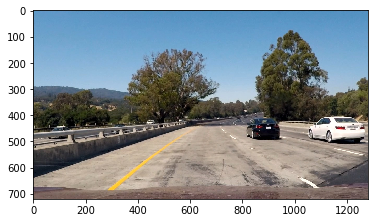

In [5]:
vehicleDetection._draw_images(vehicleDetection.test_images, n=0)

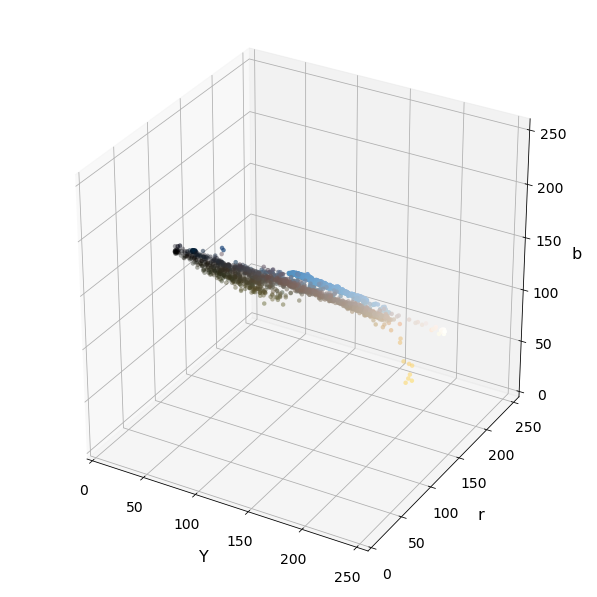

In [6]:
_ = vehicleDetection.draw_plot3d(vehicleDetection.test_images[0][0], axis_labels=list("Yrb"))

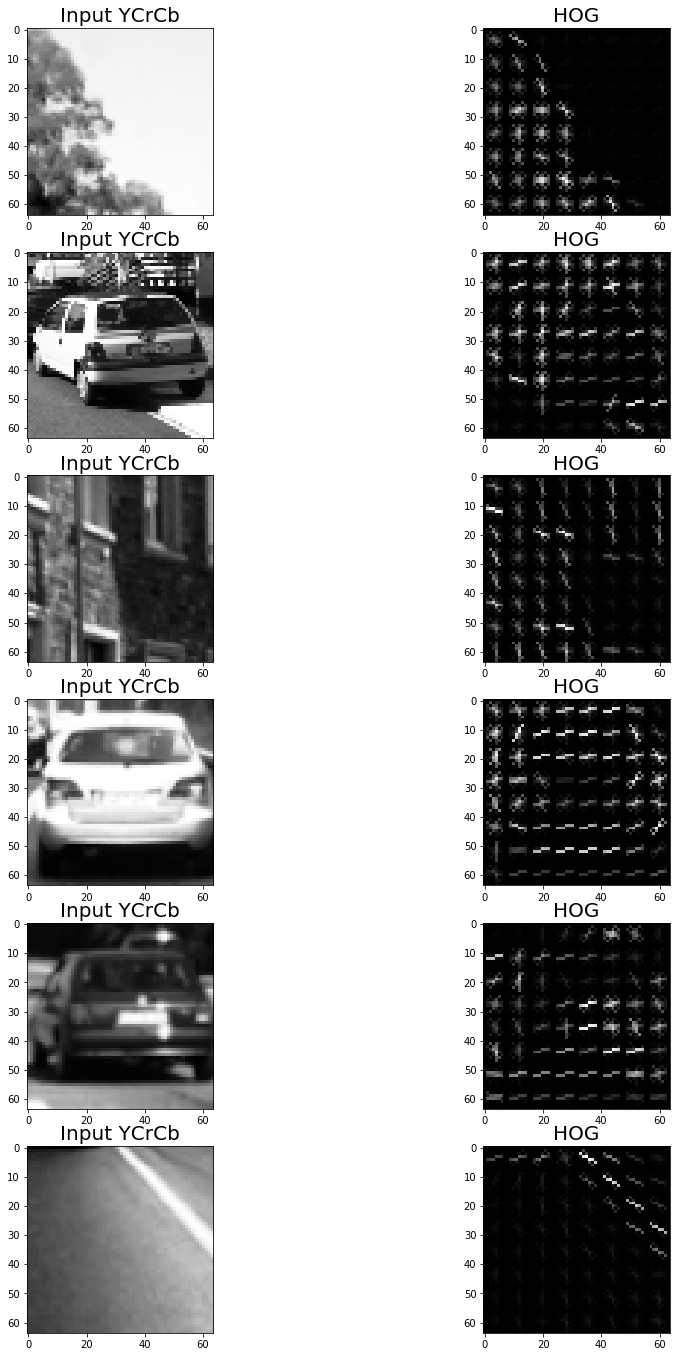

In [7]:
experiment_images = [[cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)] for img in glob.glob('experiments/*.png')]
vehicleDetection.draw_test_images_hog(experiment_images, cspace='YCrCb')

## Sliding Window Search

In [13]:
vehicleDetection.overlap = 0.75

In [18]:
vehicleDetection.win_sizes = [[64, 600, 544], [96, 607, 544],
                                                 [128, 543, 592], 
                                                 [160, 480, 679], 
                                                 [192, 463, 688], [256, 319, 719]] 

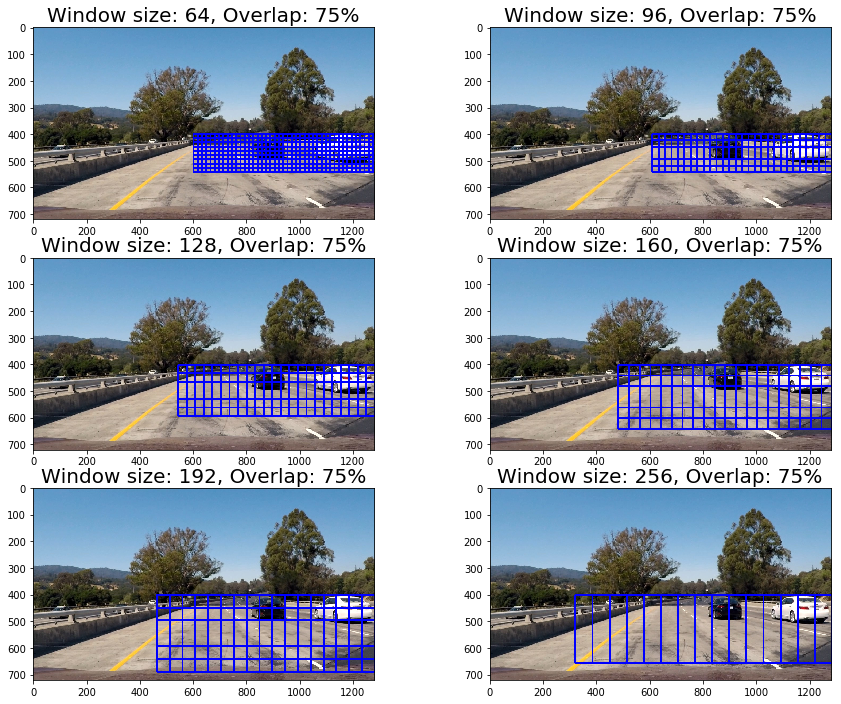

In [19]:
vehicleDetection.draw_sliding_windows()

## Pipeline test

In [23]:
vehicleDetection.heatmap_threshold = 1

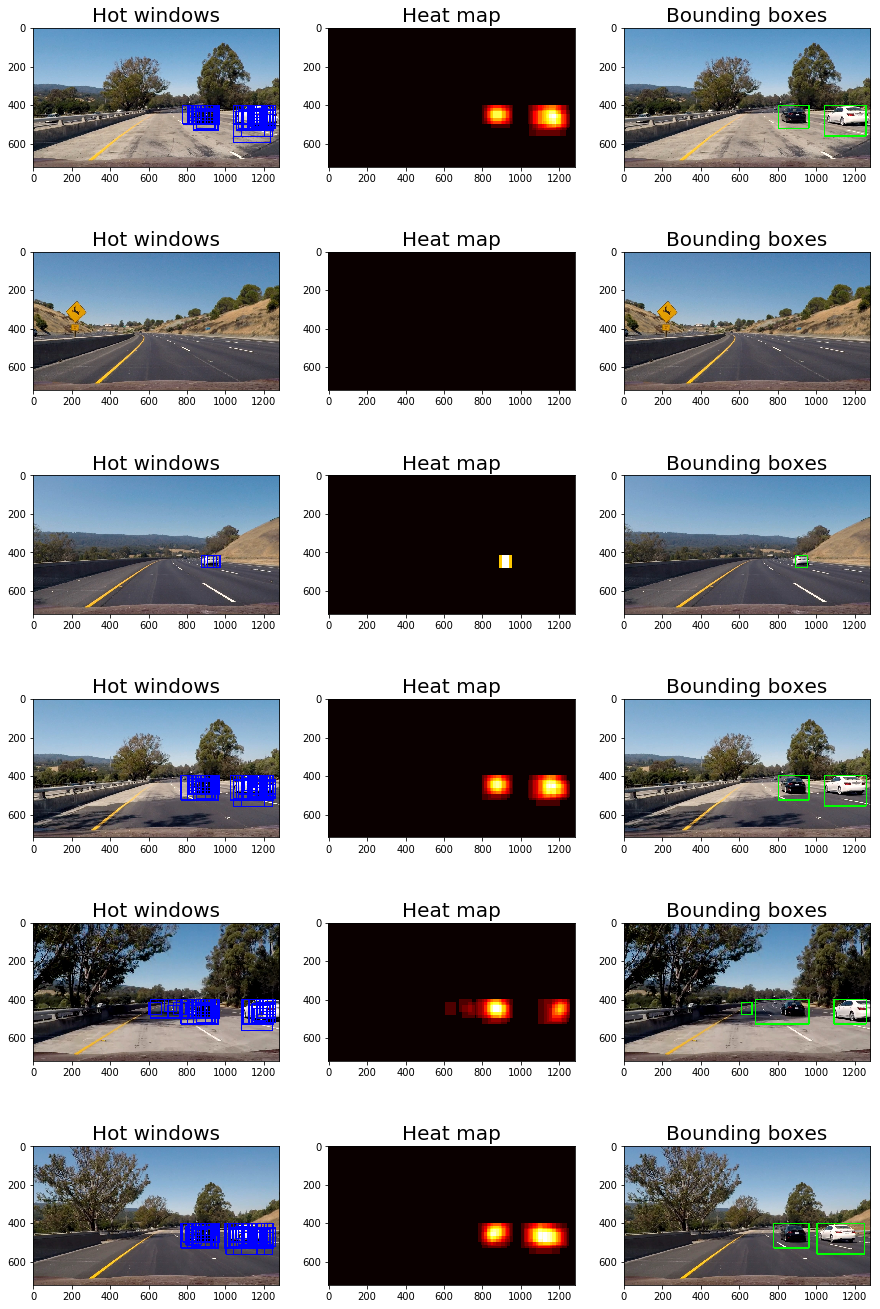

In [24]:
vehicleDetection.draw_detected_cars_multiscale()

## Video Implementation

In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

clip1 = VideoFileClip('test_video.mp4')
clip = clip1.fl_image(vehicleDetection.pipeline) #NOTE: this function expects color images!!
%time clip.write_videofile('project_video_output.mp4', audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 97%|████████████████████████████████████████▉ | 38/39 [00:32<00:00,  1.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 34.9 s
